## INTRO

## DATASETS 

This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

Link to the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers
<br>
Number of observations: 436
<br>
Number of variables (pre-cleaning): 12

### Variables

Gender:

- For this dataset, gender is categorized into two: Male and Female

Hand:

- The dominant hand of the subject

Age:

- Age of the subject in years

Educ:

- Education codes correspond to the following levels of education: 1: less than high school grad., 2:
high school grad., 3: some college, 4: college grad., 5: beyond college. 

SES:

- Socioeconomic Status (ranged from 1 to 4)

MMSE:

- Mini Mental State Examination

CDR:

- Clinical Dementia Rating (CDR; 0=
nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia). All
participants with dementia (CDR >0) were diagnosed with probable AD

eTIV:

- Estimated total Intracranial Volume

nWBV:

- Normalized Whole Brain Volume

ASF:

- Atlas Scaling Factor


### Setup

In [187]:
!pip install plotly

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
from matplotlib.pyplot import figure
import numpy as np


In [189]:
df_cross = pd.read_csv('oasis_cross-sectional.csv')

In [190]:
df_cross


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


## Data Cleaning

As seen above, there are some missing values. We are going to drop or replace these values. First, we determine which columns have missing data.

In [191]:
#determine which columns have missing data

print(df_cross.isna().sum())


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [192]:
#drop the delay and ID column from df_cross

df_cross.drop(['Delay', 'ID' , 'Hand'], axis = 1, inplace = True)
df_cross


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...
431,M,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,M,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,M,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,F,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


We dropped the "Delay", "Hand", and "ID" columns. The "Delay" column had 416 missing values (almost as much as the total number of observations), so we decided to drop it. All of the subjects are right handed, so that column is also dropped. Another thing that we have noticed was that, just by eyeballing, subjects with missing values tended to be younger than others. So, we have decided to see if that was the case **((REREAD AND WRITE THIS AGAIN))**

The average age is 26.82089552238806


Text(0.5, 1.0, 'Distribution of missing values based on subject age')

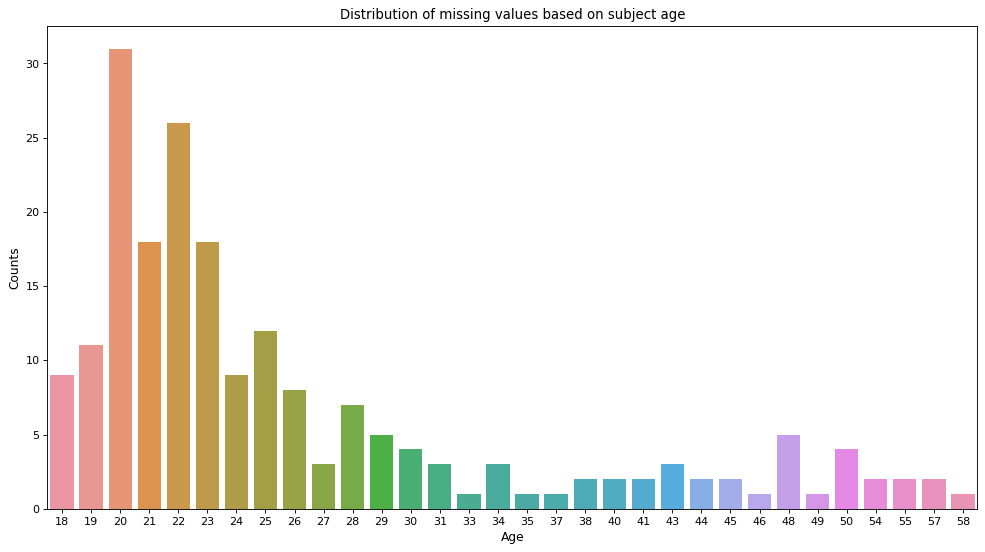

In [193]:
#Ages of subject's with missing values
nang = df_cross[df_cross['Educ'].isna() == True]['Age'].value_counts()

#Find the average age of subject's with missing values
total = 0
for idx, val in nang.iteritems():
    total = total + idx*val
m = total/sum(nang.values)
print('The average age is', m)


figure(figsize=(15, 8), dpi=80)

sns.barplot(x = nang.index, y = nang.values)
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Counts', fontsize = 11)
plt.title('Distribution of missing values based on subject age')



As we can see above, most of the missing data belongs to relatively younger people. The average age is ~27. It is fair to assume that data is not missing at random. Therefore, we will drop these rows because they might cause bias in our analysis and model. For example, younger people are usually not diagnosed with Alzheimer's and also have low Educ, this could result in low educ = low alzheimers **REREAD**

In [194]:
#remove rows with missing values

df_cross = df_cross.dropna(axis = 0, how = 'any')
df_cross.reset_index(drop = True, inplace = True)
df_cross

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
211,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [195]:
#change column names
names_cross = ['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df_cross.columns = names_cross


After dropping null values we ended up with 216 observations. Finally, we will standardize Gender. 1 for male and 0 for female

In [196]:
def standardize_gender(str_in):
    if str_in == 'M':
        return 1.0
    else:
        return 0.0

df_cross

,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
211,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [197]:
df_cross['Gender'] = df_cross['Gender'].apply(standardize_gender)
df_cross

C:\Users\poggers\AppData\Local\Temp/ipykernel_8252/2953059599.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0.0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0.0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,1.0,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,0.0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
211,0.0,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,0.0,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,0.0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,1.0,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


## Data Analysis

#### Explatory Data Analysis

First, lets see if there any pairwise relationships between our variables

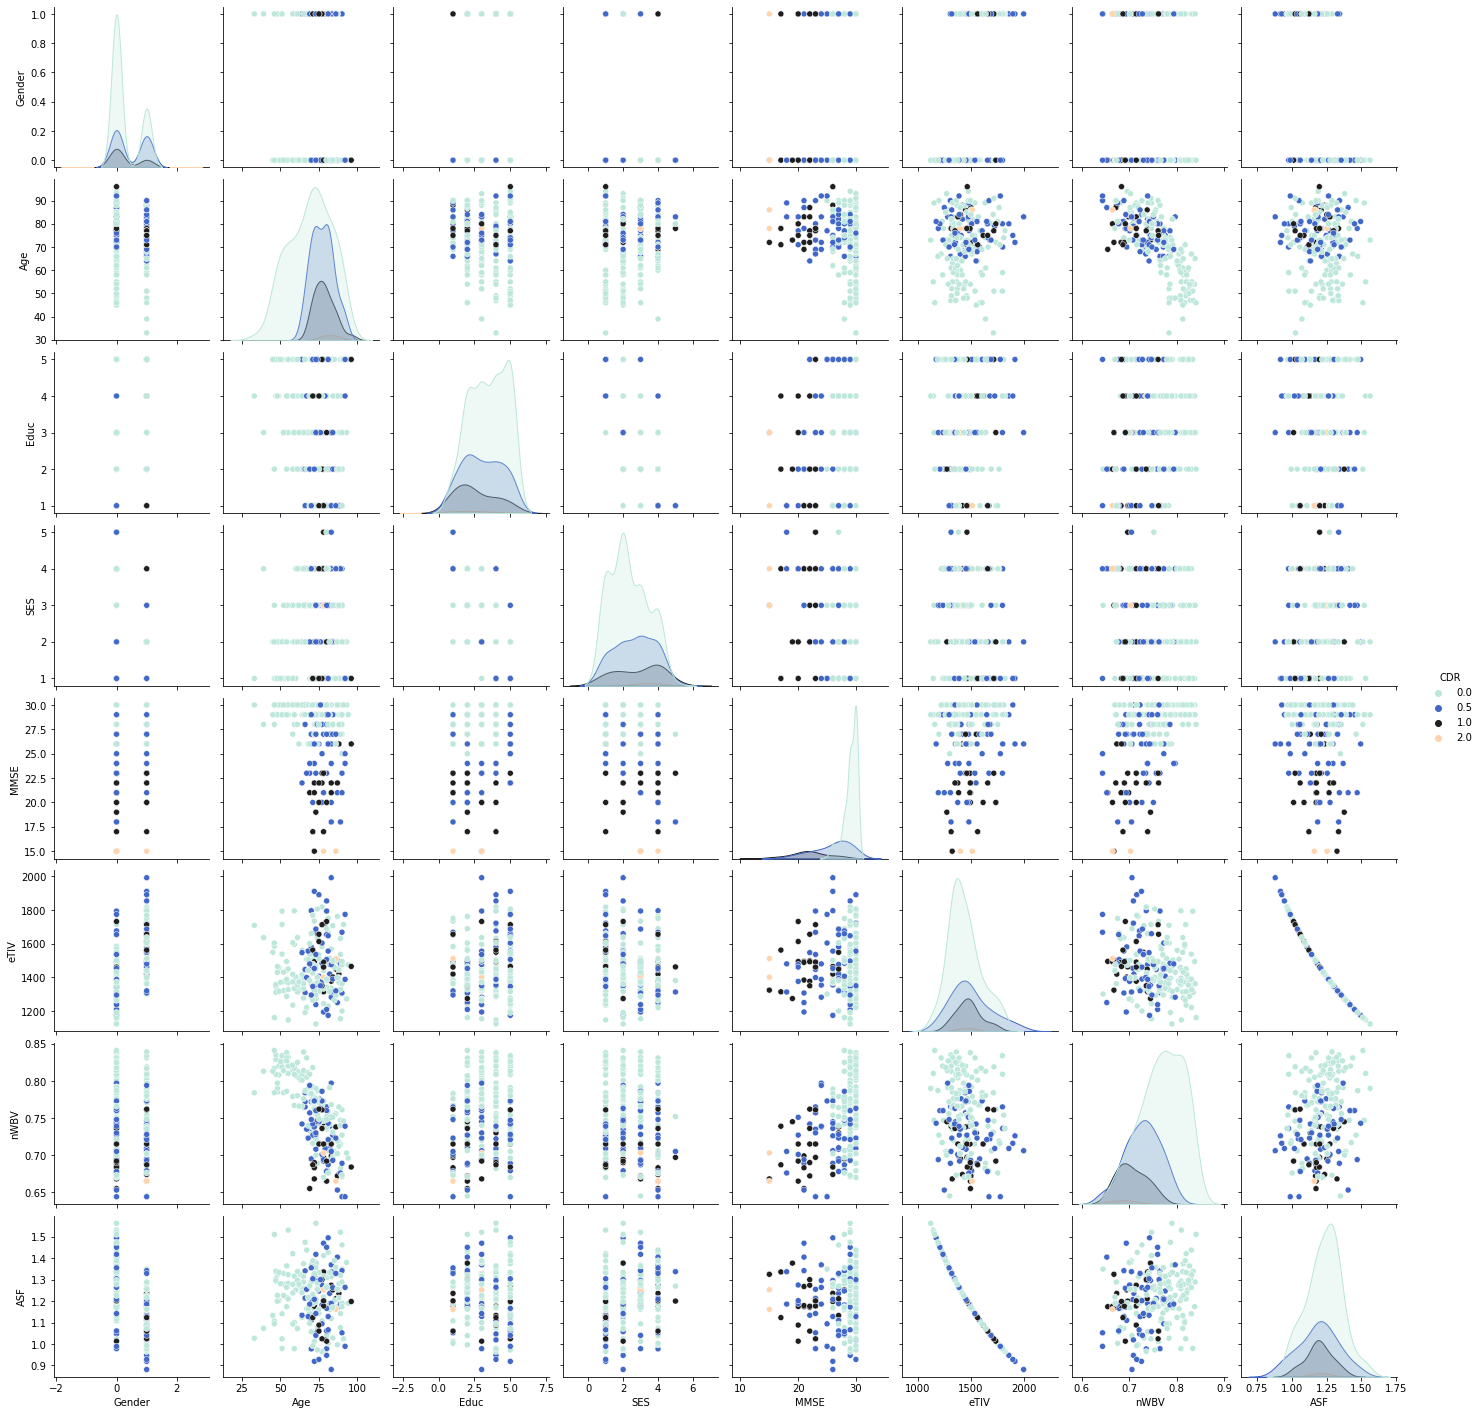

In [207]:

hued = ['2.0', '1.0', '0.5', '0.0']
sns.pairplot(df_cross, hue = 'CDR' , hue_order=hued,palette = 'icefire')

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

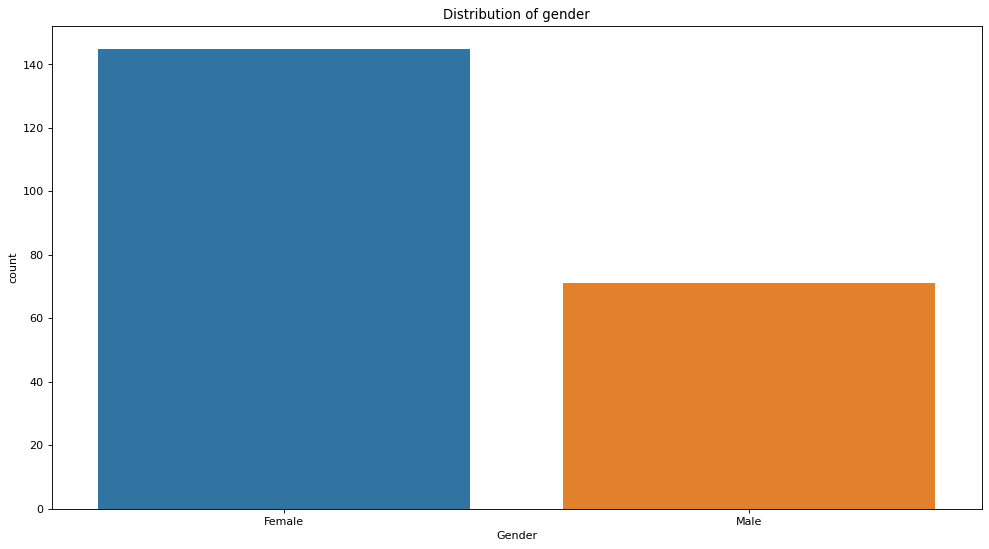

In [199]:


figure(figsize=(15, 8), dpi=80)
labels = ['Female', 'Male']
ax = plt.gca() # grab the current axis

sns.countplot(df_cross['Gender'])
plt.title('Distribution of gender')
ax.set_xticklabels(labels)

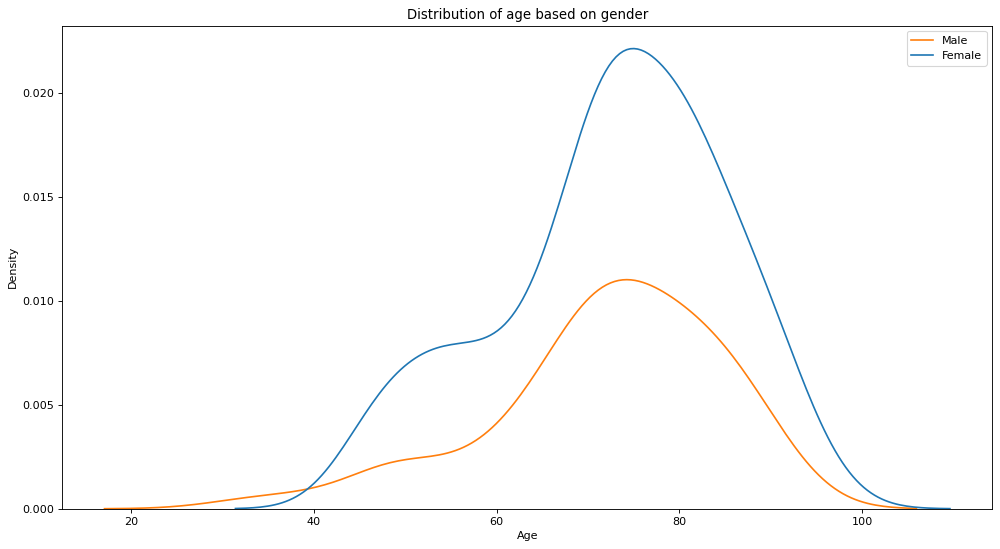

In [200]:

figure(figsize=(15, 8), dpi=80)
plt.title('Distribution of age based on gender')
ax1 = plt.gca()
sns.kdeplot(data = df_cross, x = 'Age', hue = 'Gender')
ax1.legend(labels = ['Male', 'Female'])


As we can see above, the number of female subjects is almost twice as male subjects. Also, the age distribution for both genders peaks around 70s. We can now look at age distribution of subjects with CDR > 0.0

<AxesSubplot:xlabel='Age', ylabel='Density'>

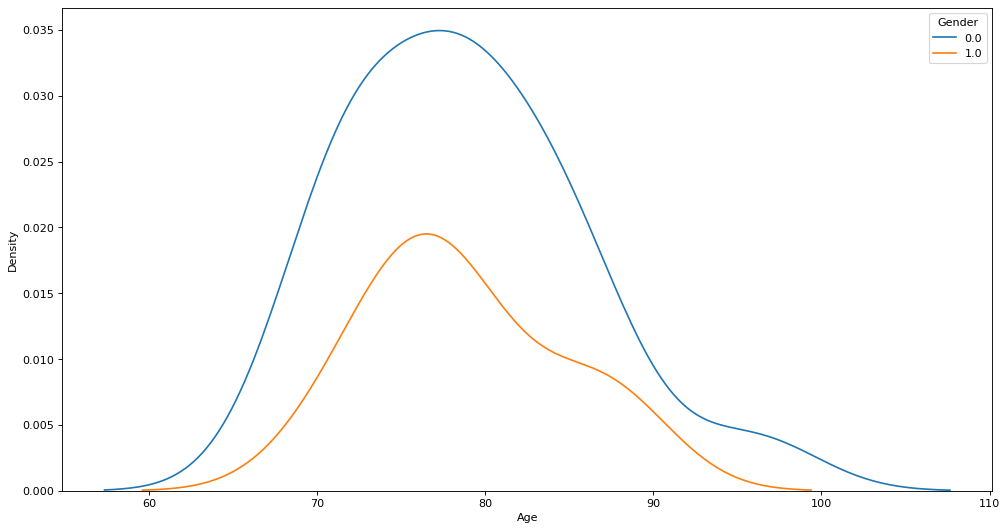

In [201]:
figure(figsize=(15, 8), dpi=80)

cdr = df_cross[df_cross['CDR'] > 0.5]

sns.kdeplot(data = cdr, x = 'Age', hue = 'Gender')

It looks like both genders almost assumed a normal distribution. We can see that they both peak around early 70s and mid 80s. Now lets visualize the relationship between education level and CDR

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Educ', ylabel='count'>

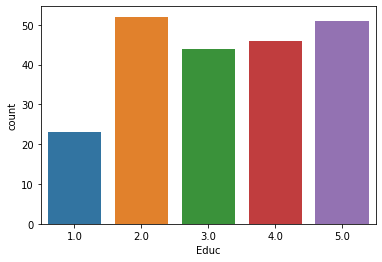

In [202]:
sns.countplot(df_cross['Educ'])

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Educ', ylabel='count'>

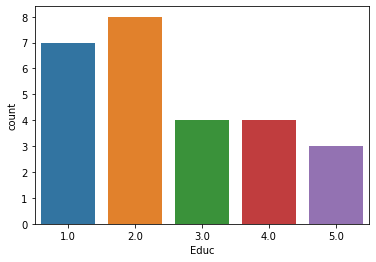

In [203]:
sns.countplot(cdr['Educ'])

In [204]:
df_cross['CDR'].value_counts()

0.0    133
0.5     57
1.0     24
2.0      2
Name: CDR, dtype: int64